In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn import datasets

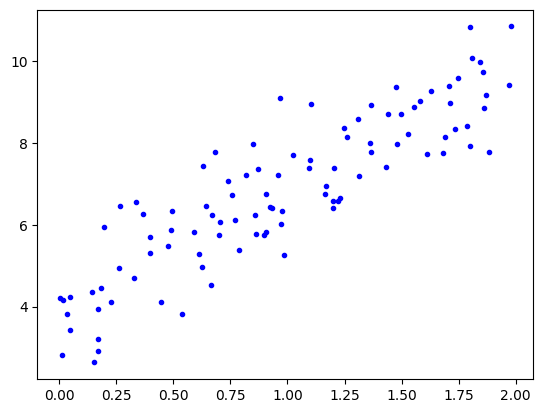

In [3]:
X = 2 * np.random.rand(100,1)
y = 3 * X + np.random.randn(100,1) + 4

plt.plot(X, y, 'b.')
plt.show()

In [4]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

a,b = lin_reg.coef_[0][0], lin_reg.intercept_[0]
print(a,b)

2.9384317755047076 3.9486287846870667


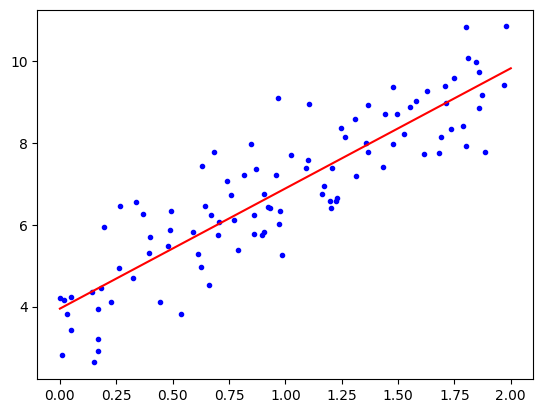

In [5]:
x = np.linspace(0,2,101)

plt.plot(X, y, 'b.')
plt.plot(x, a*x + b, 'r-')
plt.show()

In [6]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [7]:
ass,bs = sgd_reg.coef_[0], sgd_reg.intercept_[0]
print(a,b)

2.9384317755047076 3.9486287846870667


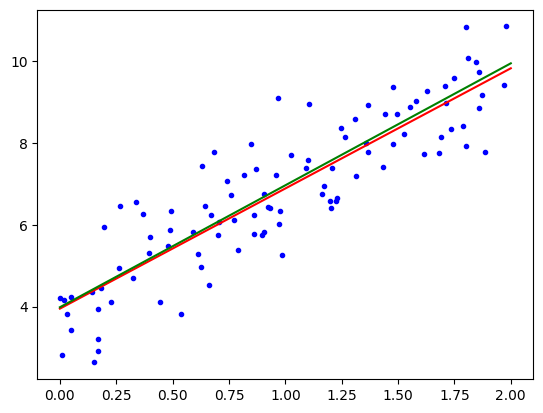

In [8]:
x = np.linspace(0,2,101)

plt.plot(X, y, 'b.')
plt.plot(x, a*x + b, 'r-')
plt.plot(x, ass*x + bs, 'g-')
plt.show()

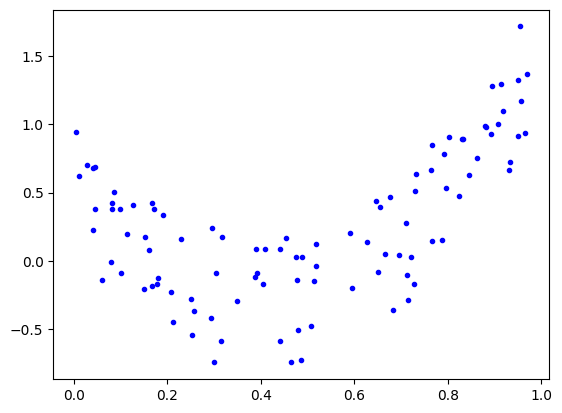

In [9]:
m = 100
X = np.random.rand(m,1)
y = 5 * X**2 - 4 * X + np.random.rand(m,1)
plt.plot(X, y, 'b.')
plt.show()

In [10]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [11]:
X_poly[0]

array([0.79092192, 0.62555748])

In [12]:
lin_reg = LinearRegression()

In [13]:
lin_reg.fit(X_poly, y)

LinearRegression()

In [14]:
lin_reg.coef_, lin_reg.intercept_

(array([[-4.09217934,  5.00455827]]), array([0.60404024]))

In [15]:
b,a = lin_reg.coef_[0]
c = lin_reg.intercept_[0]

In [16]:
a,b,c

(5.0045582705484355, -4.092179338643611, 0.6040402407483025)

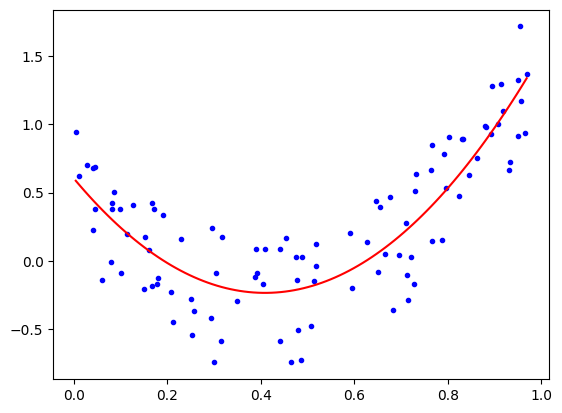

In [17]:
x = np.linspace(min(X),max(X),100)

plt.plot(X, y, 'b.')
plt.plot(x, a*x**2 + b*x + c, 'r-')
plt.show()

In [18]:
X.shape, y.shape

((100, 1), (100, 1))

In [19]:
def plot_learning_curves(model, X_, y_):
    X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=0.2)
    
    m,n = X_train.shape
    
    mse_train_list, mse_val_list, i_list = [],[],[]

    for i in range(1,m):
        model.fit(X_train[:i], y_train[:i])
        y_train_pred = model.predict(X_train[:i])
        y_val_pred = model.predict(X_val)
        mse_train = mean_squared_error(y_train[:i], y_train_pred)
        mse_val = mean_squared_error(y_val, y_val_pred)

        mse_train_list.append(mse_train)
        mse_val_list.append(mse_val)
        i_list.append(i)

    plt.plot(i_list, np.sqrt(mse_train_list), 'r+-', label='Train')
    plt.plot(i_list, np.sqrt(mse_val_list), 'b-', label='CV')
    plt.legend()
    plt.xlabel('Training size')
    plt.ylabel('RMSE')
    plt.ylim(0,1)
    plt.show()

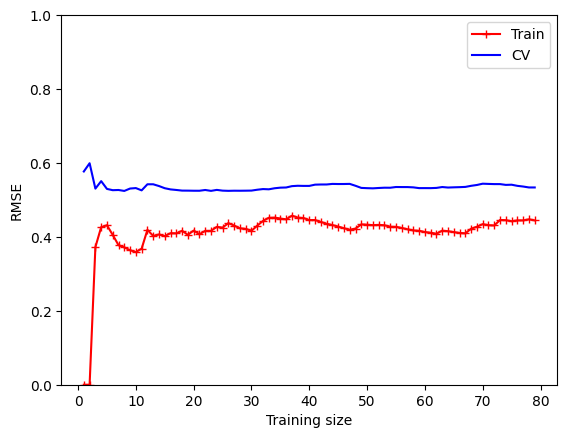

In [20]:
plot_learning_curves(lin_reg, X, y)

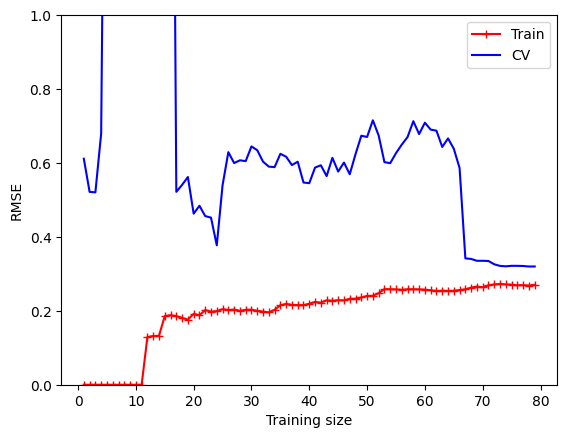

In [21]:
poly_regression = Pipeline([
    ('poly_features',PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

plot_learning_curves(poly_regression, X, y)

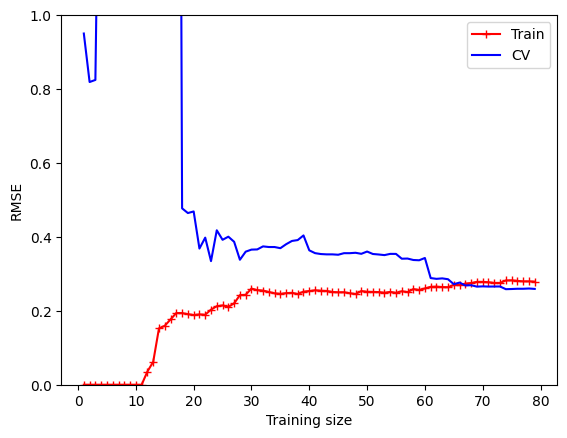

In [22]:
poly_regression_2 = Pipeline([
    ('poly_features',PolynomialFeatures(degree=2, include_bias=False)),
    ('lin_reg', LinearRegression())
])

plot_learning_curves(poly_regression, X, y)

In [23]:
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)

Ridge(alpha=1, solver='cholesky')

In [24]:
ridge_reg.predict([[1.5]])

array([[1.02177944]])

In [25]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X,y.ravel())

SGDRegressor()

In [26]:
sgd_reg.predict([[1.5]])

array([0.51809402])

In [27]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)

Lasso(alpha=0.1)

In [28]:
lasso_reg.predict([[1.5]])

array([0.26603248])

In [29]:
elastic_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_reg.fit(X,y)

ElasticNet(alpha=0.1)

In [30]:
elastic_reg.predict([[1.5]])

array([0.45581362])

Logistic Regression

In [121]:
iris = datasets.load_iris()

In [32]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [140]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(int)

In [141]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [142]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

In [143]:
iris['data'].shape

(150, 4)

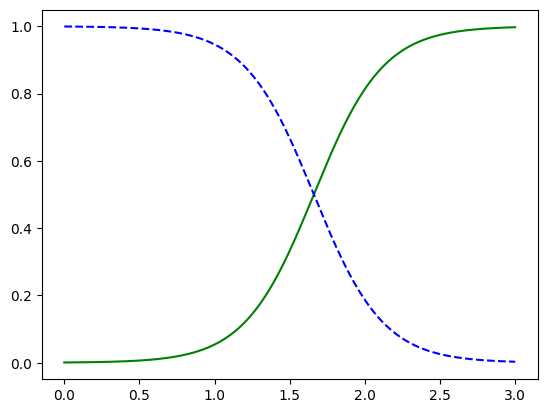

In [144]:
plt.plot(X_new, y_proba[:,1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_proba[:,0], 'b--', label='Not Iris-Virginica')
plt.show()

In [ ]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

In [ ]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [145]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [146]:
X = iris['data'][iris['target'] !=0, 2:]
y = (iris['target'][iris['target'] != 0] == 2).astype(int)

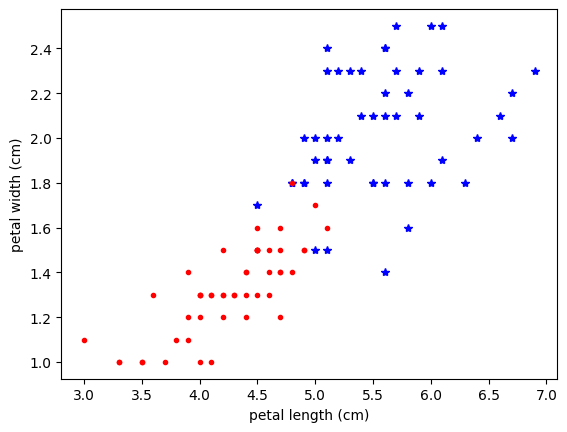

In [150]:
plt.plot(X[y==1,0], X[y==1,1], 'b*')
plt.plot(X[y==0,0], X[y==0,1], 'r.')
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
# plt.axis([2.9,7,0.8,2.7])
plt.show()

In [151]:
log_reg.fit(X,y)

LogisticRegression()

In [152]:
x0 = np.linspace(0.8,2.7,500)
x1 = np.linspace(2.9,7,500)
X_new = np.c_[x0,x1]

In [168]:
y_proba = log_reg.predict_proba(X_new)
y_pred = log_reg.predict(X_new)

In [154]:
log_reg.coef_, log_reg.intercept_

(array([[2.77743512, 2.38548149]]), array([-17.5471049]))

In [155]:
a,b = log_reg.coef_[0]
c = log_reg.intercept_

In [163]:
left_right = np.array([2.9, 7])
boundary = -(a * left_right + c) / b

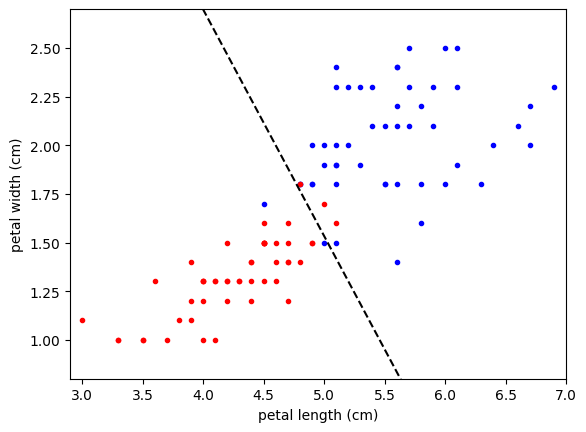

In [175]:
plt.plot(X[y==1,0], X[y==1,1], 'b.')
plt.plot(X[y==0,0], X[y==0,1], 'r.')
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.plot(left_right, boundary, 'k--')
plt.axis([2.9,7,0.8,2.7])
plt.show()

Softmax Regression

In [178]:
X = iris['data'][:,2:]
y = iris['target']

In [179]:
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [181]:
softmax_reg.predict([[5,2]])

array([2])

In [182]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])